In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('sales_data.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# dropping blank columns
df.drop(['Status', 'unnamed1'], inplace=True, axis=1)

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# Amount column contains 12 null values, dropping those 12 rows
df.dropna(inplace=True)

In [10]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


Exploratory Data Analysis

As this is a data analysis from the perspective of seller for consumer, it will include what gender, age-group, state, product-category, occupation, amount, etc all this kind of features for contribution in their sales.

1) Gender

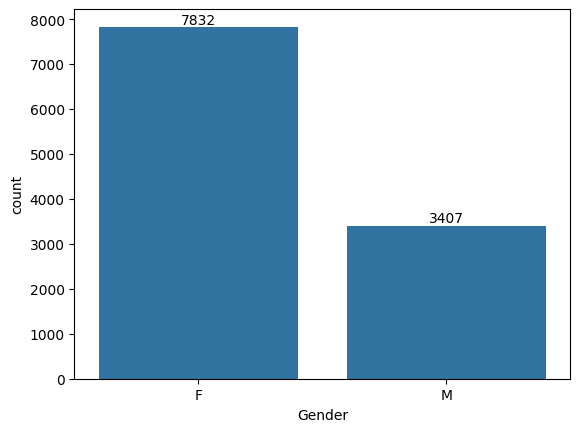

In [13]:
ax = sns.countplot(x = 'Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

# We can see that the most of the buyers are females.

<Axes: xlabel='Gender', ylabel='Amount'>

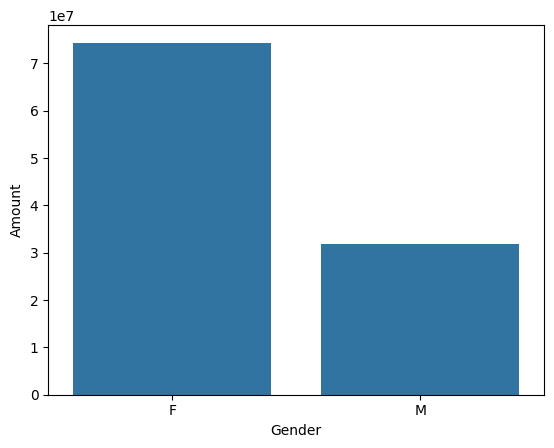

In [14]:
gender_sales = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data = gender_sales, x = 'Gender', y = 'Amount')

# Also females apend more on shoppping as compared to males.

2) Age

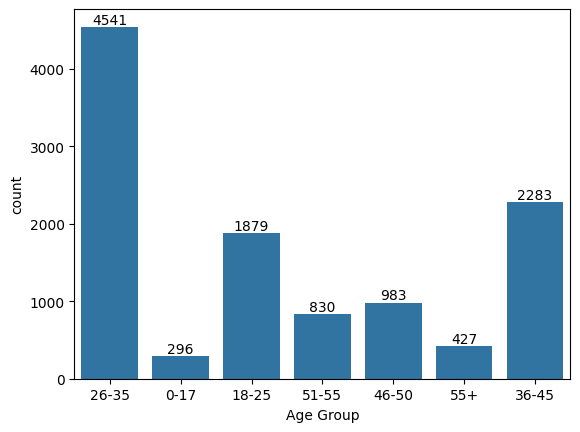

In [15]:
ax = sns.countplot(data = df, x = 'Age Group')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

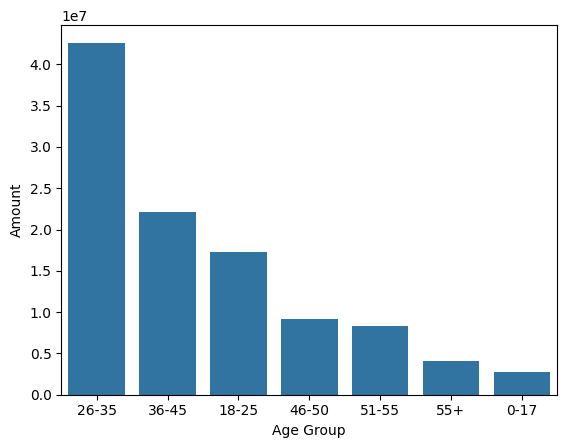

In [16]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data = sales_age, x = 'Age Group', y = 'Amount')

# We can see that most of the buyer lies in age group of 26-35 years. 

3) State

<Axes: xlabel='State', ylabel='Orders'>

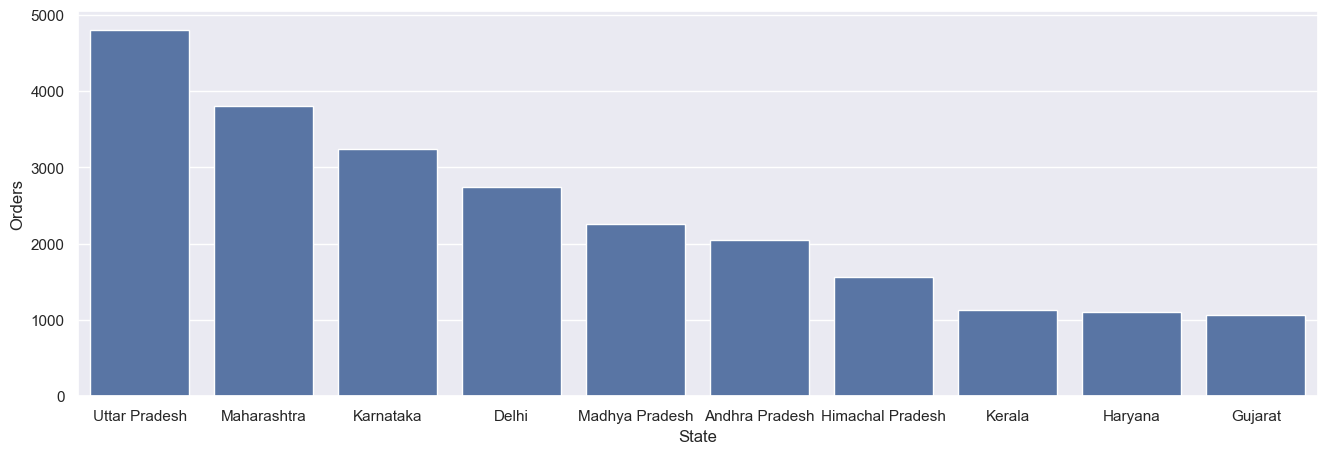

In [17]:
state_sales = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = state_sales, x = 'State', y= 'Orders')

In [18]:
# From the above plot, it is clearly seen that most number of orders are being placed from Uttar Pradesh followed by Maharashtra.

<Axes: xlabel='State', ylabel='Amount'>

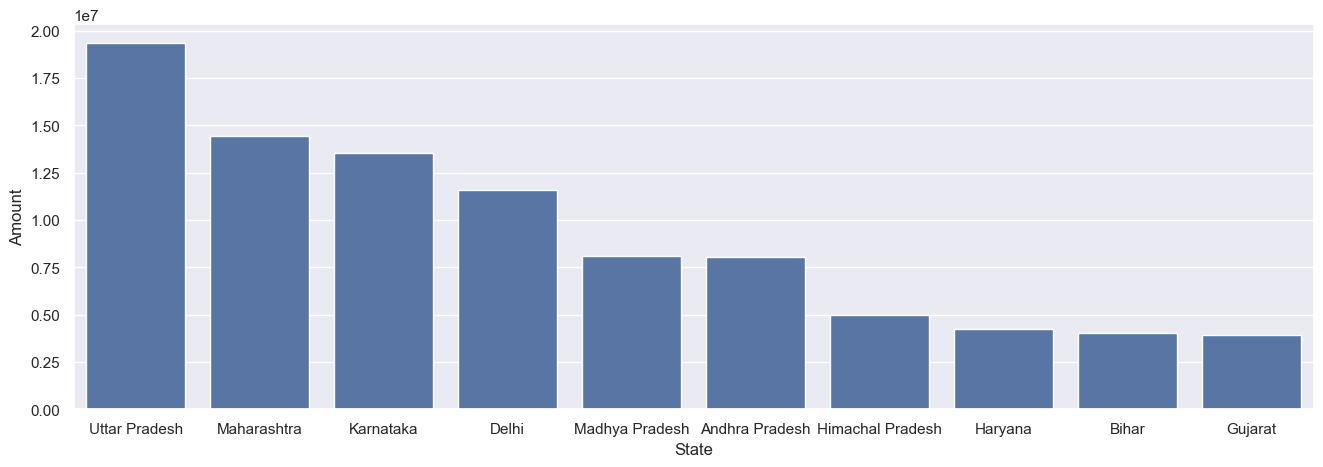

In [19]:
state_sales = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = state_sales, x = 'State',y= 'Amount')

In [20]:
# From this above curve, the most amount spent is also from Uttar Pradesh and Maharashtra

4) Marital Status

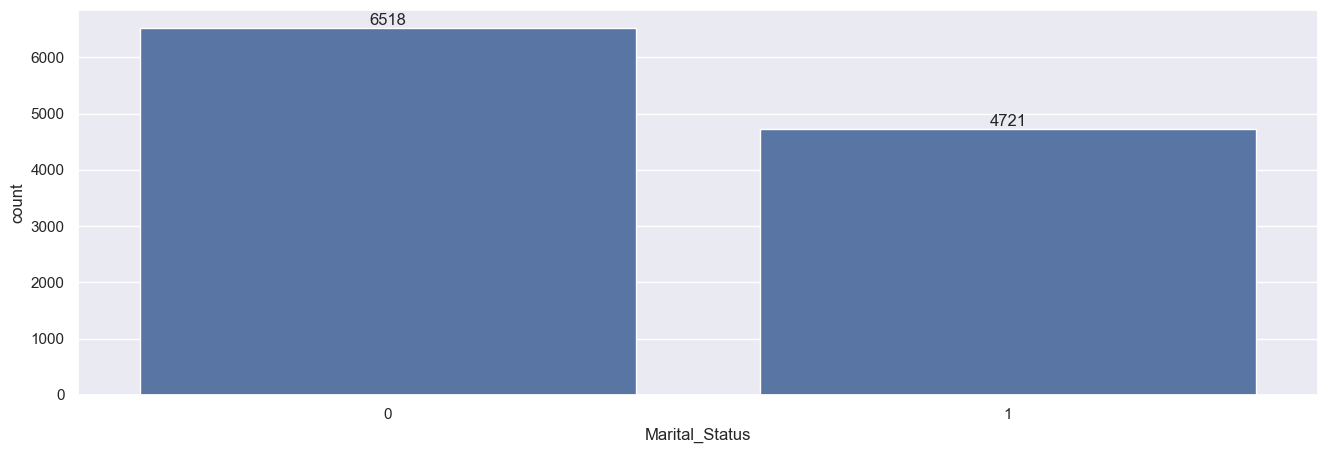

In [21]:
ax = sns.countplot(data = df, x = 'Marital_Status')
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

# We can observe that most of the buyers are unmarried.

<Axes: xlabel='Marital_Status', ylabel='Amount'>

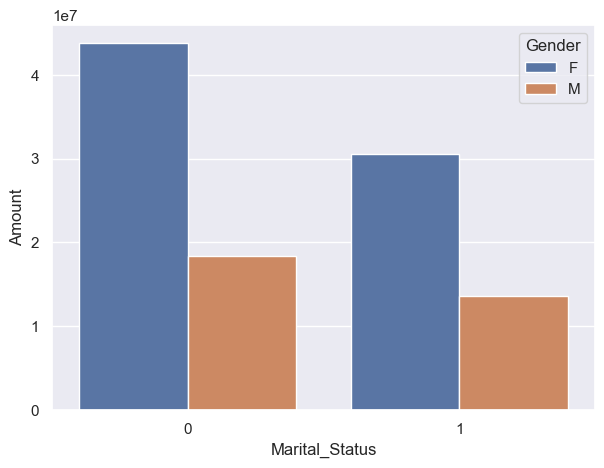

In [22]:
status_sales = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data = status_sales, x = 'Marital_Status',y= 'Amount', hue='Gender')

# From the below plot, it can be observed that irrespective of the marital status, females spent more than males.

5) Occupation

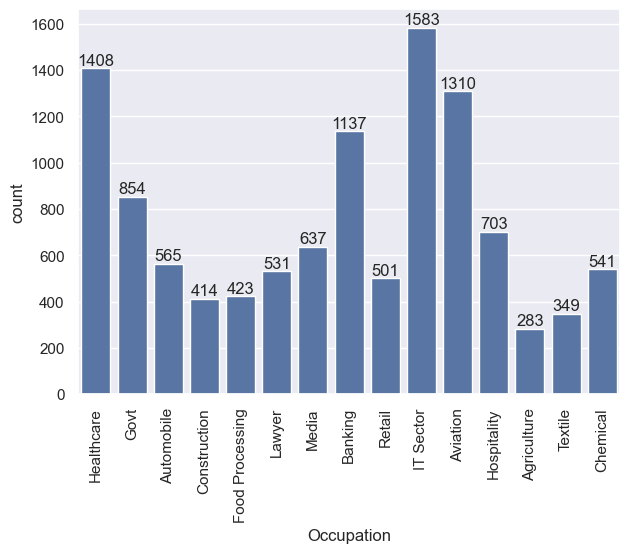

In [23]:
ax = sns.countplot(data = df, x = 'Occupation')
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)

In [24]:
# From the above plot, most of the buyers are working in IT sector.

<Axes: xlabel='Occupation', ylabel='Amount'>

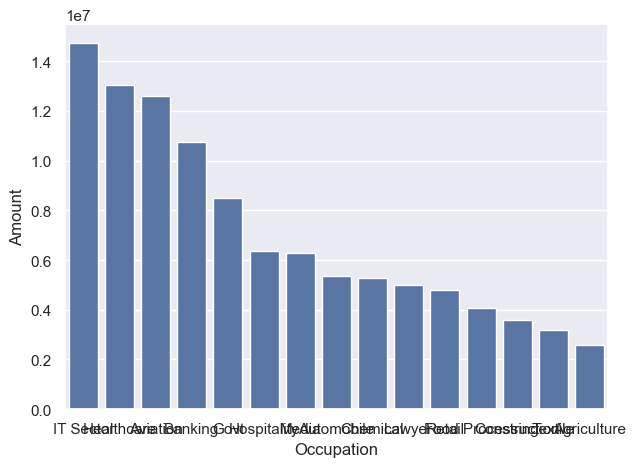

In [25]:
occupation_sales = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data = occupation_sales, x = 'Occupation',y= 'Amount')

In [26]:
# From the above graph, it can be observed that most of the amount spent is done by people working in IT sector followed by Healthcare.

6) Product Category

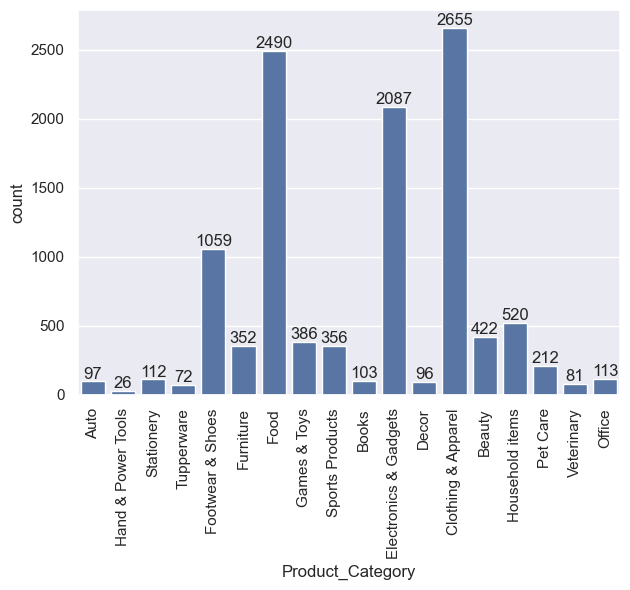

In [27]:
ax = sns.countplot(data = df, x = 'Product_Category')
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)

# We can see that the most of the buyers buys clothing and food products.

<Axes: xlabel='Product_Category', ylabel='Amount'>

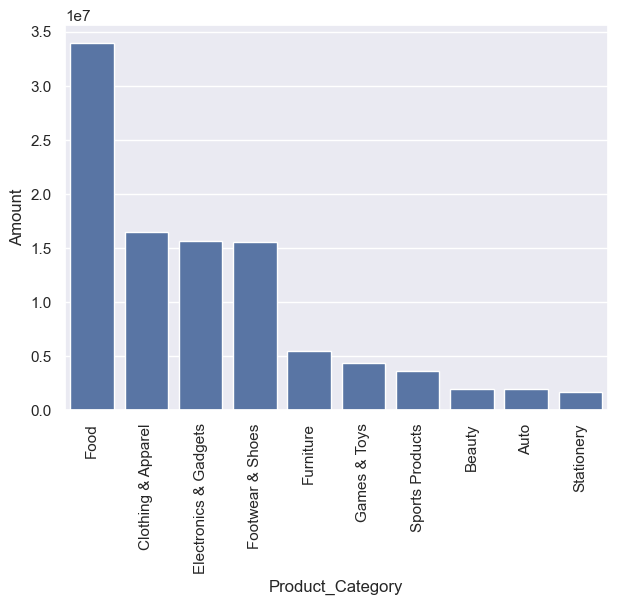

In [28]:
category_sales = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.xticks(rotation=90)
sns.barplot(data = category_sales, x = 'Product_Category',y= 'Amount')

# From this below plot, it can be clearly observed that the most of the revenue of the company comes from food and clothing sector

Conclusion

We can conclude that the married women of age-group lies between 26-35 from UP and Maharashtra who are working in the field of IT, Healthcare are more likely to buy products like Food items and Clothes from this company.